

# Project: Investigate a Dataset (No- show Appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### This project investigates and analyzes the Dataset of the No-show Appointments.

#### We will be going through the following questions:
- Does an SMS Reminder have an impact on the patient showing up?
- Is showing up associated with a certain gender?
- Is having an education can have an impact on a patient showing up?
- Do diseases like Diabetes, Hipertension, or being Alcholic can be a factor of patient's absence?


In [2]:
# importing packages used in this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


In [3]:
#loading data from csv into a datframe
df = pd.read_csv('KaggleV2-May-2016.csv')

### Investigating through the Dataset

In [4]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

#### Nearly 20% of the patients didnt show up to their appointment

In [8]:
df.shape

(110527, 14)

In [9]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


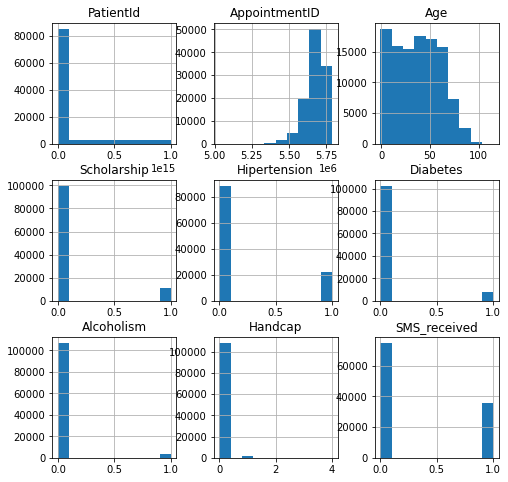

In [11]:
#showing histogram for all the variables affecting the patient showing up to the appointment
df.hist(figsize=(8,8));

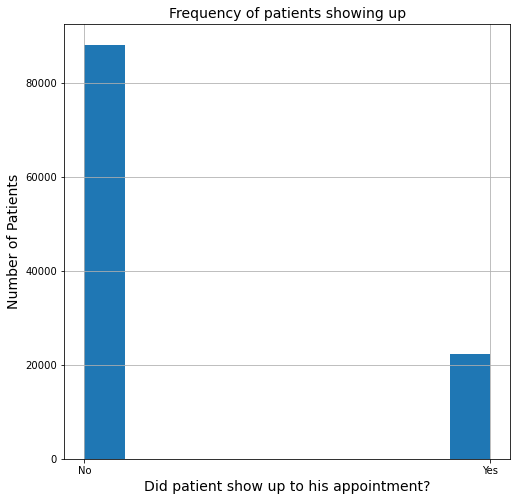

In [13]:
df['No-show'].hist(figsize=(8,8));
plt.xlabel('Did patient show up to his appointment?', fontsize= 14);
plt.ylabel('Number of Patients',fontsize=14);
plt.title('Frequency of patients showing up', fontsize= 14);
#Take in consideration that 'Yes' if they didnt show up and 'No' for showing up

In [14]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [15]:
df['PatientId'].duplicated().sum()

48228

#### Patients must be having several appointments

In [16]:
df[df.duplicated(['PatientId'])]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
27,1.215484e+13,5628345,F,2016-04-27T10:51:45Z,2016-04-29T00:00:00Z,4,CONQUISTA,0,0,0,0,0,0,No
154,1.925263e+10,5636933,F,2016-04-28T16:38:34Z,2016-04-29T00:00:00Z,30,ITARARÉ,0,0,0,0,0,0,No
288,2.246214e+13,5532908,M,2016-03-31T12:39:06Z,2016-04-29T00:00:00Z,43,CARATOÍRA,0,0,0,0,0,1,Yes
290,7.222383e+12,5566070,M,2016-04-11T09:50:18Z,2016-04-29T00:00:00Z,7,CARATOÍRA,0,0,0,0,0,1,No
316,1.756579e+13,5582867,F,2016-04-14T10:01:09Z,2016-04-29T00:00:00Z,1,JOANA D´ARC,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110521,3.635534e+13,5651072,F,2016-05-03T08:23:40Z,2016-06-07T00:00:00Z,53,MARIA ORTIZ,0,0,0,0,0,1,No
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [17]:
df.PatientId.nunique()

62299

## Notes after Investigating:

***Quality issues:***
- AppointmentDay and ScheduledDay Data type should be date time instead of object
- columns as (Scholarship, Hypertension, diabetes, Alcoholism, Handicap,SMS_recieved, No-show) data type should be bool.
- max value in Handcap column is 4(not clear why) , and values for all other columns are either 0 for No and 1 for Yes 
- min Age value is -1
- rename columns (Handcap, hipertension)



### Data Cleaning

In [18]:
#copying the dataframe to avoid the occurence of any harm to the original data
df_c = df.copy()

In [19]:
display(df_c.dtypes)

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [20]:
#changing ApointmentDay and ScheduledDay data type from object to datetime
df_c['ScheduledDay']=pd.to_datetime(df_c['ScheduledDay'])
df_c['AppointmentDay']=pd.to_datetime(df_c['AppointmentDay'])

In [21]:
#testing
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

In [22]:
df_c.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [23]:
#investgaring patients with age = -1
a=df_c[df_c['Age']== -1]
a

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No


In [24]:
#dropping patient with age = -1 with index = 99832
df_c= df_c[df_c['Age'] != -1]

In [25]:
#testing 
df_c[df_c['Age']== -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [26]:
#changing targeted columns into bool data type:
bool_columns = ['Scholarship','Hipertension','Diabetes','Alcoholism','SMS_received']

for columns in bool_columns:
    df_c[columns]= df_c[columns].astype(bool)

In [27]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110526 non-null  float64            
 1   AppointmentID   110526 non-null  int64              
 2   Gender          110526 non-null  object             
 3   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 5   Age             110526 non-null  int64              
 6   Neighbourhood   110526 non-null  object             
 7   Scholarship     110526 non-null  bool               
 8   Hipertension    110526 non-null  bool               
 9   Diabetes        110526 non-null  bool               
 10  Alcoholism      110526 non-null  bool               
 11  Handcap         110526 non-null  int64              
 12  SMS_received    110526 non-null  bool               
 13  No-show       

In [28]:
df_c.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,False,True,False,False,0,False,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,False,False,False,0,False,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,False,False,False,False,0,False,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,False,False,False,False,0,False,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,True,True,False,0,False,No


#### No-show column still have True if  patient didn't show up and False if they did.

In [29]:
#renaming columns
df_c.rename(columns={'No-show':'noshow', 'Hipertension':'Hypertension','Handcap':'Handicap'}, inplace=True)

In [30]:
#testing
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110526 non-null  float64            
 1   AppointmentID   110526 non-null  int64              
 2   Gender          110526 non-null  object             
 3   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 5   Age             110526 non-null  int64              
 6   Neighbourhood   110526 non-null  object             
 7   Scholarship     110526 non-null  bool               
 8   Hypertension    110526 non-null  bool               
 9   Diabetes        110526 non-null  bool               
 10  Alcoholism      110526 non-null  bool               
 11  Handicap        110526 non-null  int64              
 12  SMS_received    110526 non-null  bool               
 13  noshow        

<a id='eda'></a>
## Exploratory Data Analysis

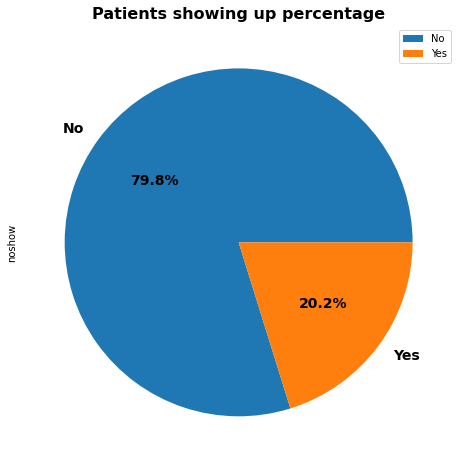

In [31]:
#Percentage of patients showing up to their appointments
df_c['noshow'].value_counts().plot(kind='pie',figsize=(8,8),textprops={'fontsize': 14, 'weight': 'bold'},autopct='%1.1f%%');
plt.title('Patients showing up percentage',fontsize= 16, weight = 'bold');
plt.legend();
# Taking in consideration that "No" if they show up and 'Yes' if they didn't show up

### Research Question 1 (Does an SMS Reminder have an impact on the patient showing up? )

In [32]:
#function for pie plotting
def pie_visual (df_c,var):
    df_c[var].value_counts().plot(kind= 'pie', figsize=(8,8),textprops={'fontsize': 14, 'weight': 'bold'},autopct='%1.1f%%')
    plt.title(f'{var} Impact on Patient showing up'.title(), fontsize= 16, weight = 'bold')
    plt.axis('equal')
    plt.legend();
    

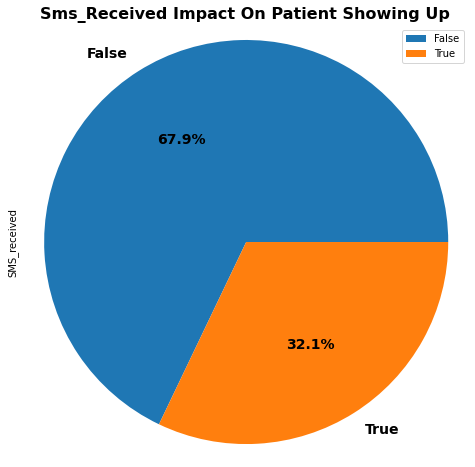

In [33]:
#plotting SMS_recieved 
pie_visual(df_c,'SMS_received')

### More than 65% of the patients didn't receive an SMS reminder, so we need to anlyze does the sms reminder does really have an impact, and those who recieved it actually showed up to the appointment or not?

In [34]:
#groupby noshow and sms_reminder to analyze the real impact on showing up
sms=df_c.groupby('noshow')['SMS_received'].value_counts()
sms

noshow  SMS_received
No      False           62509
        True            25698
Yes     False           12535
        True             9784
Name: SMS_received, dtype: int64

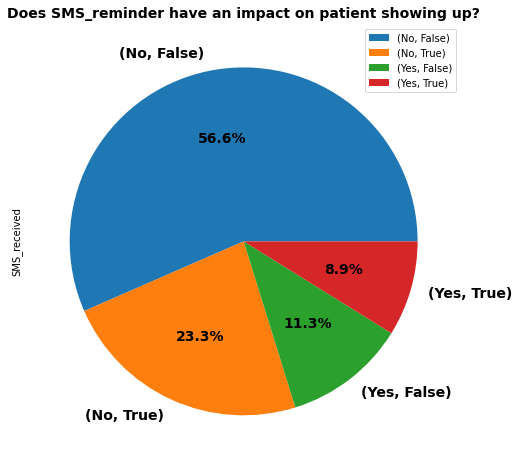

In [35]:
#plotting pie chart
sms.plot(kind='pie',figsize=(8,8),textprops={'fontsize': 14, 'weight': 'bold'},autopct='%1.1f%%');
plt.title('Does SMS_reminder have an impact on patient showing up?',fontsize= 14, weight = 'bold');
plt.legend();

### More than 55% didn't recieve an sms reminder and still show up to the appointment, and only 11% of patients  didn't recieve an sms didn't show up. So maybe SMS_reminder doesn't have a big effect on indicating whether the patient is going to show up or not.

### Research Question 2  (Is showing up associated with a certain gender?)

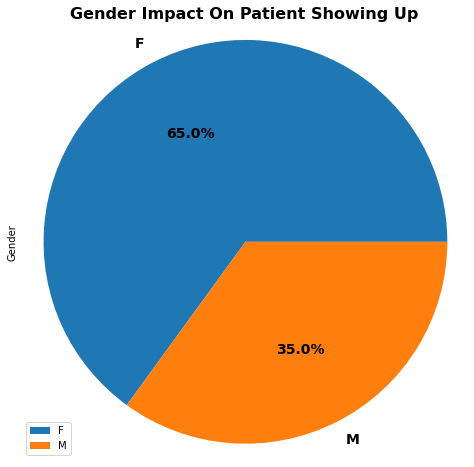

In [36]:
pie_visual(df_c,'Gender')

### 65% of the patients are Females

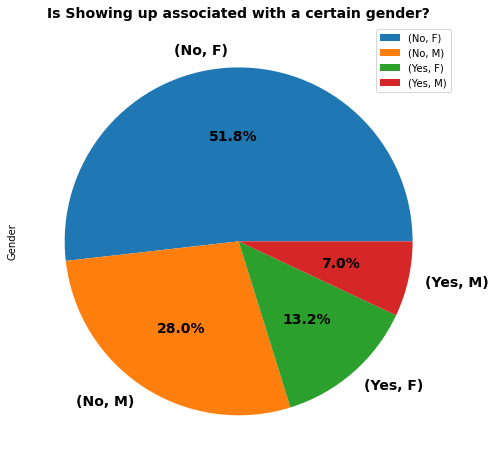

In [37]:
gender=df_c.groupby('noshow')['Gender'].value_counts()
gender.plot(kind='pie',figsize=(8,8),textprops={'fontsize': 14, 'weight': 'bold'},autopct='%1.1f%%');
plt.title('Is Showing up associated with a certain gender?',fontsize= 14, weight = 'bold');
plt.legend();

### Females have more appointments in the dataset than males. It also have high rate of showing up to their appointments 

### Research Question 3 (Is having a scholarship/education can have an impact on a patient showing up? )

In [38]:
#masking patients who showed up and who didn't
show = df_c.noshow == 'No'
noshow = df_c.noshow == 'Yes'

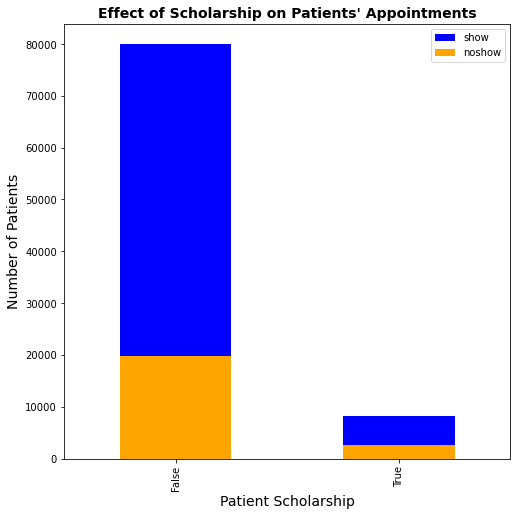

In [41]:
df_c.Scholarship[show].value_counts().plot(kind= 'bar', color= 'blue', label= 'show', figsize=(8,8));
df_c.Scholarship[noshow].value_counts().plot(kind= 'bar', color= 'orange', label= 'noshow', figsize=(8,8));
plt.legend();
plt.title('Effect of Scholarship on Patients\' Appointments',fontsize= 14, weight = 'bold');
plt.xlabel('Patient Scholarship',fontsize=14);
plt.ylabel('Number of Patients', fontsize=14);

### Most of the patients who showed up don't have a scholarship

### Research Question 4 (Do diseases like Diabetes, Hipertension, or being Alcholic can be a factor of patient's absence? )

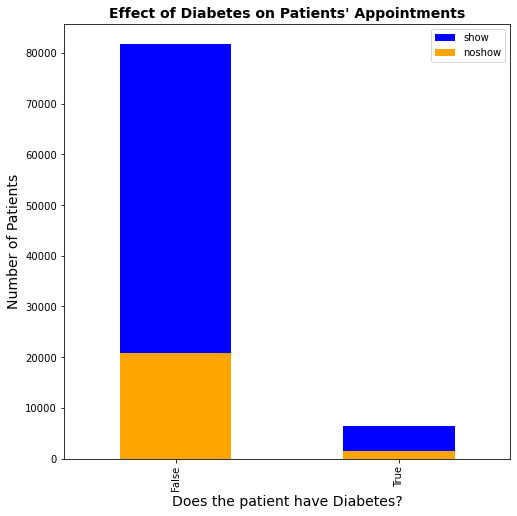

In [42]:
#Plotting Diabetes with patients showing up
df_c.Diabetes[show].value_counts().plot(kind= 'bar', color= 'blue', label= 'show', figsize=(8,8));
df_c.Diabetes[noshow].value_counts().plot(kind= 'bar', color= 'orange', label= 'noshow', figsize=(8,8));
plt.legend();
plt.title('Effect of Diabetes on Patients\' Appointments',fontsize= 14, weight = 'bold');
plt.xlabel('Does the patient have Diabetes?',fontsize=14);
plt.ylabel('Number of Patients', fontsize=14);

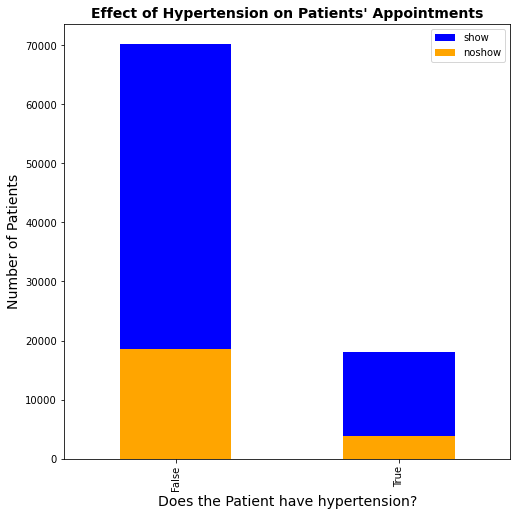

In [43]:
#Plotting Hypertension with patients showing up
df_c.Hypertension[show].value_counts().plot(kind= 'bar', color= 'blue', label= 'show', figsize=(8,8));
df_c.Hypertension[noshow].value_counts().plot(kind= 'bar', color= 'orange', label= 'noshow', figsize=(8,8));
plt.legend();
plt.title('Effect of Hypertension on Patients\' Appointments',fontsize= 14, weight = 'bold');
plt.xlabel('Does the Patient have hypertension?',fontsize=14);
plt.ylabel('Number of Patients', fontsize=14);

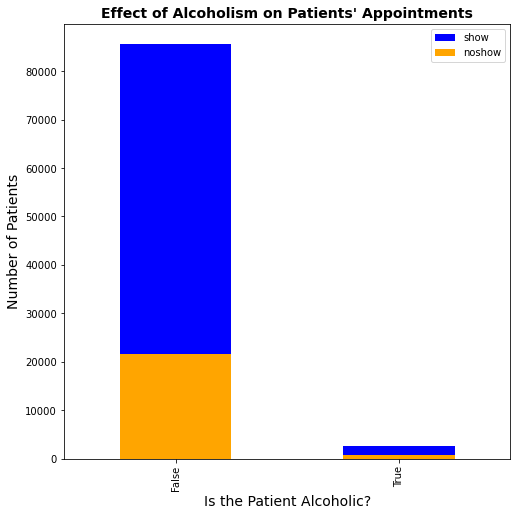

In [44]:
#Plotting Alcoholism with patients showing up
df_c.Alcoholism[show].value_counts().plot(kind= 'bar', color= 'blue', label= 'show', figsize=(8,8));
df_c.Alcoholism[noshow].value_counts().plot(kind= 'bar', color= 'orange', label= 'noshow', figsize=(8,8));
plt.legend();
plt.title('Effect of Alcoholism on Patients\' Appointments',fontsize= 14, weight = 'bold');
plt.xlabel('Is the Patient Alcoholic?',fontsize=14);
plt.ylabel('Number of Patients', fontsize=14);

### Majority of Patients don't have Diabetes, Hipertension or Alcoholic

<a id='conclusions'></a>
## Conclusions

###  - SMS_reminders doesn't really have a massive impact; most of patients have showed up to their appointments even though they didn't recieve an SMS
### - Females have more appointments, they are also the most to show up to them.
### - Having a scholarship doesn't affect patients coming to their appointment, on the contary, most of the patients that show up don't have a scholarship.
### - Most Patinets don't have chronic diseases
## Limitation:
### - In this dataset, there are no details regarding certain factors, as the SMS_reminder; most of the patients showed up even if they didn't recieve it , there is no information about when the sms is sent. for example: it may target frequent non-showers, or the sms is not recieved on time before the scheduled appointment.
### - Most of the variables are categorical , there is no space for using type of stastics other than the Descriptive one.